# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
    print("It shows the spending per wholesale customer on that category per year.")
    display(pd.DataFrame(data.head(2)))
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.
It shows the spending per wholesale customer on that category per year.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [9]:
# Display a description of the dataset
display(data.describe()) # shows per column statistics from dataset. Columns contain usd values for spending.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalise columns around mean to check distribution
norm_data = scaler.fit_transform(data)

norm_data = pd.DataFrame(norm_data, columns=data.columns)
# plot
#norm_data.hist(bins=200)
# they all seems quite biased to low values

# describe
#display(norm_data.describe())


#norm_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Frozen,Fresh,Delicatessen,Detergents_Paper,Grocery,Milk
0,13223,27167,1902,92,2128,2801
1,15601,3,550,15,7021,333
2,36,85,1423,24231,45828,20959


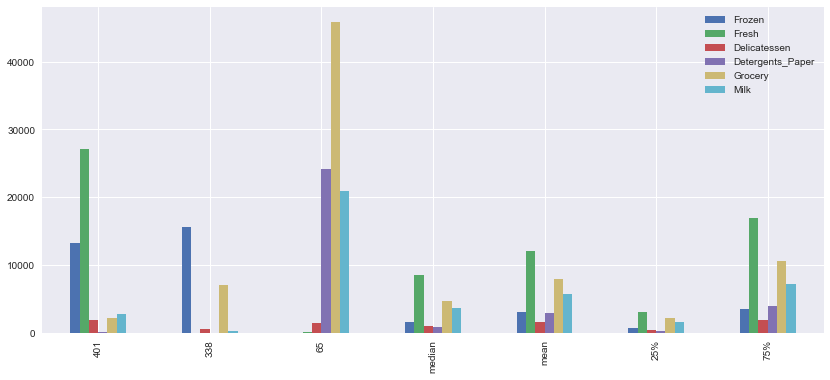

In [27]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [401, 338, 65]

retailer = data[data["Frozen"]>=9000]
#print(retailer)
market = data[data["Detergents_Paper"] >= 8000]
#print(market)


# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


# show samples values as bars, also show whole dataset mean values as bars
import seaborn as sns
samples = samples.append(data.describe().loc["50%"])
samples = samples.append(data.describe().loc["mean"])
samples = samples.append(data.describe().loc["25%"])
samples = samples.append(data.describe().loc["75%"])


samples_as_barchart = samples

#samples_as_barchart = samples
samples_as_barchart.index = indices + ['median', 'mean', '25%', '75%'] # add mean to x axis
_ = samples_as_barchart.plot(kind='bar', figsize=(14,6))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
- Example 401 is above median on Fresh, Frozen, Deli, and below on rest. This is could be a food market as it would be higher than the median in those categories . 
- Example 338 are above mean and median and 75 percentile on Frozen, above median on Grocery, below on rest so could be a fish shop selling frozen fish.
- Example 65 is a high multiple of the IQR on Grocery and milk and detergents paper - it could be a very popular cofee shop.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [ ]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
testDependentFeature = "Detergents_Paper"

new_data = data.drop([testDependentFeature], axis=1)
target = data[testDependentFeature]
from sklearn.cross_validation import train_test_split

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=5)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=6)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("R-squared for explaining {} is {}".format(testDependentFeature, score))
# Detergents_Paper seems to have highest R-squared.

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict Detergent_Paper. The prediction score was 0.6606. This means this feature can be explained with around 66% accuracy using all the other features combined. I would say it is still required as this is only slightly better than chance.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [ ]:
# Produce a scatter matrix for each pair of features in the data
# plot each feature against each other feature in pairs.
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde'); 

# feature against feature produces the distribution of that feature

In [ ]:
# check feature distributions
data.Detergents_Paper.hist(bins=200)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes, Detergents Paper seems to correlate with Grocery, and maybe Grocery with Milk a bit. This confirms my suspicions for Detergents ag Grocery by looking at the plot. Further, the data for these features is clearly not normally distributed, but heavily skewed towards lower values, so positively skewed. This means the median falls below the mean. This lack of normal distribution applies to all features in fact, probably due to the fact that there are a lot more small food shops than large ones.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  27167   2801     2128   13223                92          1902
1      3    333     7021   15601                15           550
2     85  20959    45828      36             24231          1423
       Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.209758  7.937732   7.662938  9.489713          4.521789      7.550661
1   1.098612  5.808142   8.856661  9.655090          2.708050      6.309918
2   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523


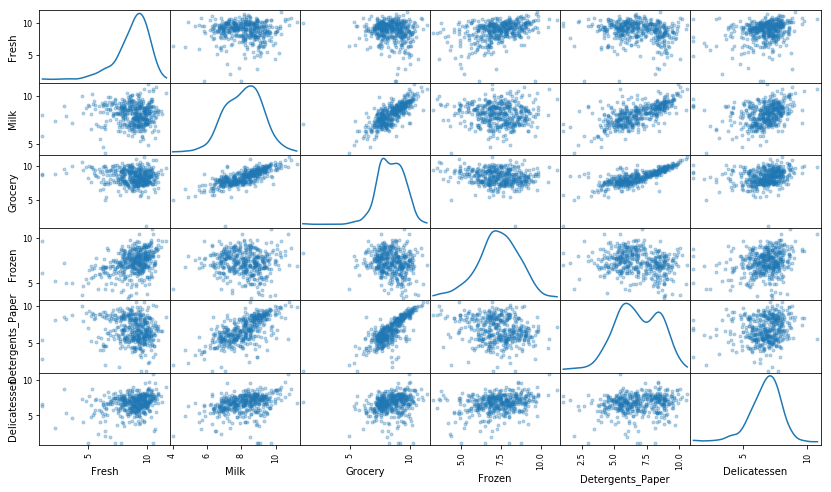

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))
print(samples)
print(log_samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# now the features are much more normally distributed.

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.209758,7.937732,7.662938,9.489713,4.521789,7.550661
1,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
2,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [15]:
# For each feature find the data points with extreme high or low values
indices = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print("Q1-step is {}, Q3+step is {}, the step size is {}".format(Q1-step, Q3+step, step))
    # the ~ operator flips the booleans
    outliers = log_data[~((log_data[feature] >= (Q1 - step)) & (log_data[feature] <= (Q3 + step)))][feature]
    display(outliers)
    
    # add indices
    indices.extend(outliers.index)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = indices

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

from collections import Counter
print(Counter(outliers))

Data points considered outliers for the feature 'Fresh':
Q1-step is 5.51455083361, Q3+step is 12.2705718166, the step size is 2.53350786861


65     4.442651
66     2.197225
81     5.389072
95     1.098612
96     3.135494
128    4.941642
171    5.298317
193    5.192957
218    2.890372
304    5.081404
305    5.493061
338    1.098612
353    4.762174
355    5.247024
357    3.610918
412    4.574711
Name: Fresh, dtype: float64

Data points considered outliers for the feature 'Milk':
Q1-step is 5.01673296722, Q3+step is 11.1987283614, the step size is 2.31824827282


86     11.205013
98      4.718499
154     4.007333
356     4.897840
Name: Milk, dtype: float64

Data points considered outliers for the feature 'Grocery':
Q1-step is 5.27575998758, Q3+step is 11.672709891, the step size is 2.3988562138


75     1.098612
154    4.919981
Name: Grocery, dtype: float64

Data points considered outliers for the feature 'Frozen':
Q1-step is 4.26035024816, Q3+step is 10.5252235842, the step size is 2.34932750101


38      3.496508
57      3.637586
65      3.583519
145     3.737670
175     3.951244
264     4.110874
325    11.016479
420     3.218876
429     3.850148
439     4.174387
Name: Frozen, dtype: float64

Data points considered outliers for the feature 'Detergents_Paper':
Q1-step is 1.45874266385, Q3+step is 12.3636993597, the step size is 4.08935876094


75     1.098612
161    1.098612
Name: Detergents_Paper, dtype: float64

Data points considered outliers for the feature 'Delicatessen':
Q1-step is 3.76959400251, Q3+step is 9.74900908097, the step size is 2.24228065442


66      3.295837
109     1.098612
128     1.098612
137     3.583519
142     1.098612
154     2.079442
183    10.777768
184     2.397895
187     1.098612
203     2.890372
233     1.945910
285     2.890372
289     3.091042
343     3.610918
Name: Delicatessen, dtype: float64

Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are 5 data points that are outliers in more than one dimension. We should remove them too as the would distort the data in more than 1 dimension. The points in the outliers list should all be remove given we use Tukey's outlier definition.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

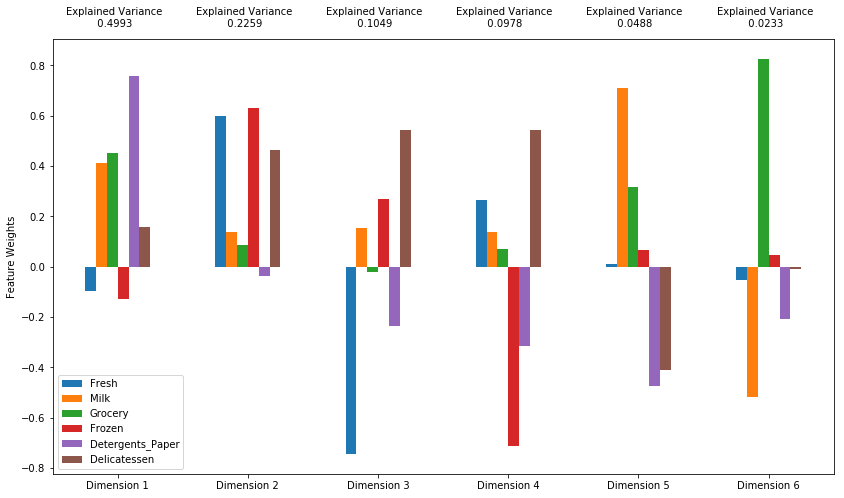

In [16]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
# this applies dimensionality reduction to each sample
pca_samples = pca.transform(log_samples)
#print(pca_samples)

# Generate PCA results plot, indicating how much each feature contributes to each dimension.
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase (between examples) in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights. 

**Answer:** Together the first and second principal component explain 72.52% of total variance. The first four pc explain 92.79% of total variance.

I dont understand the hint: dimensions are not increasing, they are new features that have values which are either high or low. Ah, maybe it means if you compare two examples, if a dimension increases this indicates that the positively weighted features in its portfolio increase and the negative weight features decrease. The rate of increase depends on the rate of the weight changes in its feature portfolio i guess..

- Dimension 1 is Detergents_paper, Milk, Grocery with some representation of Deli. This is probably consumer retail spending.
- Dimension 2 is Fresh, Frozen and Deli, with some representation for Milk and Grocery. This is probably a hotel or restaurant.
- Dimension 3 is Deli with some Frozen and Milk, with very low Fresh and low Detergents_Paper. This could be a speciality shop such as a butcher. 
- Dimension 4 is Deli with some Fresh but very low Frozen and low Detergents_Paper. This could be a market, where they sell fresh food and meat.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
display(pd.DataFrame(samples))


# hard to see how it works...

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.4072,2.4079,0.5245,-0.0848,0.5462,-0.0377
1,-3.4491,-3.6586,6.7584,-2.9439,0.6921,2.9431
2,5.3109,-4.5845,2.0274,1.1669,-0.0343,0.3363


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,27167,2801,2128,13223,92,1902
1,3,333,7021,15601,15,550
2,85,20959,45828,36,24231,1423


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.4072,2.4079
1,-3.4491,-3.6586
2,5.3109,-4.5845


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

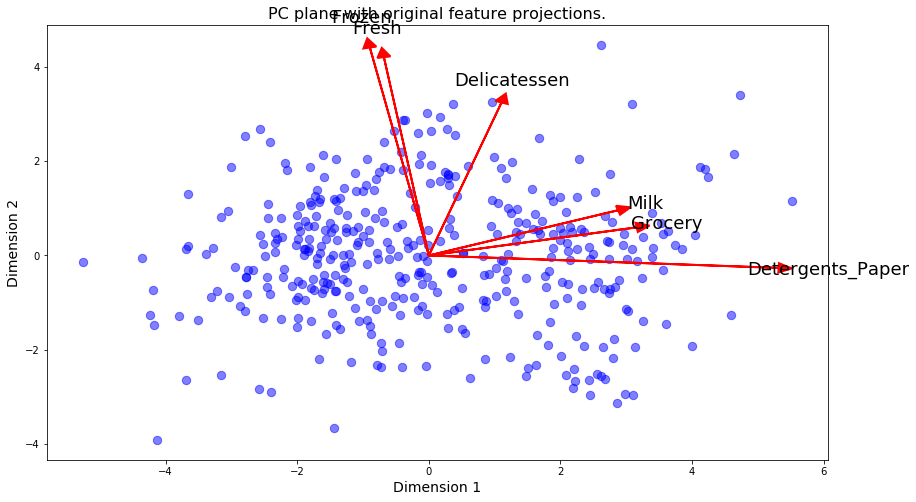

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

- First Dimension: detergents, grocery and milk (positively) - agrees with previous plot feature weights. 

- Second Dimension: Deli, Frozen, Fresh, also positively. Agrees too.

So the length of the arrow is the weight of that feature in the dimension, the direction indicates how much each dimension is exposed to that feature.


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The K-means algorithm will try to find clusters of points that are close to each other: a point can belong to only one cluster at a time. The Gaussian Mixture model allows points to belong to several clusters at a time, with a certain probability. Given wholesale customers might belong to several possible clusters, such as the "small place" cluster or the "deli" cluster at the same time, I would use the gaussian mixture model which allows this. Further, the mixture model incorporates the covariance information of the data (http://scikit-learn.org/stable/modules/mixture.html) which I believe is desirable, given we have some feature correlation. We should have enough points per cluster, so calculating the covariance matrix should work.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
# Use the ouput of PCA reduced to 2 components as input for the Gaussian Mixture Model

nb_comp = [2,3,4,5,6,7]

val_out = 2
for val_comp in nb_comp:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    from sklearn.mixture import GaussianMixture
    clusterer = GaussianMixture(random_state=5, n_components=val_comp).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds_loc = clusterer.predict(reduced_data)
    #print(preds)

    # TODO: Find the cluster centers
    centers_loc = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds_loc = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(X=reduced_data, labels=preds_loc)
    print("Nb comps: {}, score: {}".format(val_comp, score))
    
    if val_out == val_comp:
        preds = preds_loc
        centers = centers_loc
        sample_preds = sample_preds_loc

Nb comps: 2, score: 0.447411995571
Nb comps: 3, score: 0.359479670374
Nb comps: 4, score: 0.312405270688
Nb comps: 5, score: 0.3285065946
Nb comps: 6, score: 0.28969365136
Nb comps: 7, score: 0.328311049677


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 2 clusters has the best silhouette score. I am guessing 1 cluster would be even better as it has no alternatives, but it throws an error.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

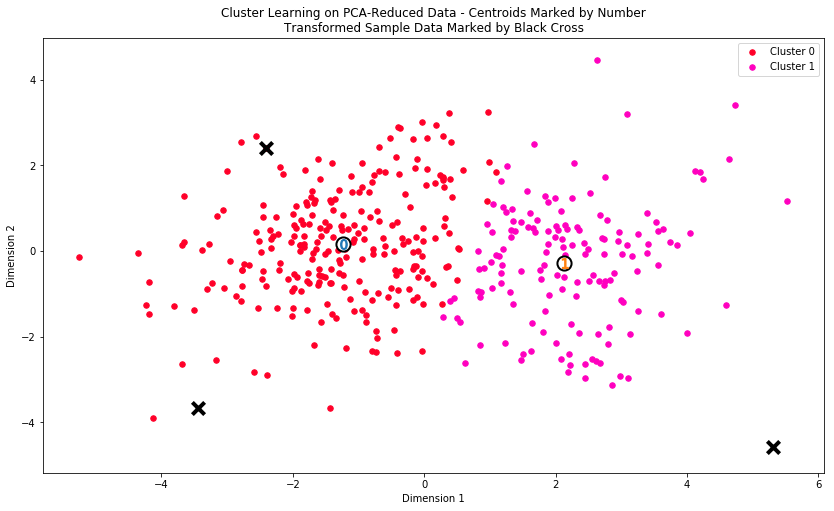

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# the black X are my samples, the round circles the cluster centers.


### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# This shows the cluster centers on the first 2 components of PCA.

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers) # recovers original features from pca dimensions
#print("log centers", log_centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers) # recover original values from log values
#print("true centers" ,true_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

# order features, so can focus on comparison not retrieval
tmp = true_centers
ordered = pd.DataFrame(tmp.Frozen)
ordered["Fresh"] = tmp.Fresh
ordered["Delicatessen"] = tmp.Delicatessen
ordered["Detergents_Paper"] = tmp.Detergents_Paper
ordered["Grocery"] = tmp.Grocery
ordered["Milk"] = tmp.Milk
true_centers = ordered


tmp = data
ordered = pd.DataFrame(tmp.Frozen)
ordered["Fresh"] = tmp.Fresh
ordered["Delicatessen"] = tmp.Delicatessen
ordered["Detergents_Paper"] = tmp.Detergents_Paper
ordered["Grocery"] = tmp.Grocery
ordered["Milk"] = tmp.Milk
data = ordered

display(true_centers)

display(data.describe())

,Frozen,Fresh,Delicatessen,Detergents_Paper,Grocery,Milk
Segment 0,2196.0,9468.0,799.0,343.0,2624.0,2067.0
Segment 1,1068.0,5174.0,1101.0,4536.0,11581.0,7776.0


,Frozen,Fresh,Delicatessen,Detergents_Paper,Grocery,Milk
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,3071.931818,12000.297727,1524.870455,2881.493182,7951.277273,5796.265909
std,4854.673333,12647.328865,2820.105937,4767.854448,9503.162829,7380.377175
min,25.000000,3.000000,3.000000,3.000000,3.000000,55.000000
25%,742.250000,3127.750000,408.250000,256.750000,2153.000000,1533.000000
50%,1526.000000,8504.000000,965.500000,816.500000,4755.500000,3627.000000
75%,3554.250000,16933.750000,1820.250000,3922.000000,10655.750000,7190.250000
max,60869.000000,112151.000000,47943.000000,40827.000000,92780.000000,73498.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Comparing the feature values for each segment with the statistical description of each feature, it seems that:

To be fair, i am not sure how to answer these very well, as I find it hard to get myself interested in food establishments and what they might buy. It might be more interesting to segment drivers for economic performance, predictors of burglary or maybe internet user groups. However, here my attempt.

PC:
- Dim 2 represents Frozen, Fresh and Deli. A higher value means more of these.
- Dim 1 represents Detergents_Paper, Grocery and milk. A higher value means more of these.

Clusters:
- Segment 0 (any dim2, <0.5 dim1). Here I expect  it to have any value for dim2 features be lower on dim1 features than Segment 1 and on the lower end of the distribution for those features. Thus, it would have low Detergents_Paper, Grocery and Milk, so low consumer retail spending. This could represent a restaurant, food market, hotel.
- Segment 1 (any dim2, >=0.5 dim1). Here I expect any dim2 features and higher values on dim1 features, and also at the higher end of the distribution for those features. So high Detergents_Paper, Grocery and Milk, indicating retail spending like a supermarket.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** Point 0 is a market as it has a lot of frozen fresh and deli and little detpaper, grocery and milk. This matches the prediction in cluster 0. Point 1 an outlier(as found earlier) so was removed and 2 was and outlier on 2 dimensions so was removed as well. However, Point 2 was high on Det_Paper, Grocery and Milk, so would be correctly classified as retail in cluster 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The distributor could call, survey etc a representative customer, or several, from each segment and ask them. They could use this to extrapolate to all customers from this segment and change his schedule by segment.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** They can transform the estimated spending to principal components using the trained pca on the original data. This would allow them to assign new customers to their clusters.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

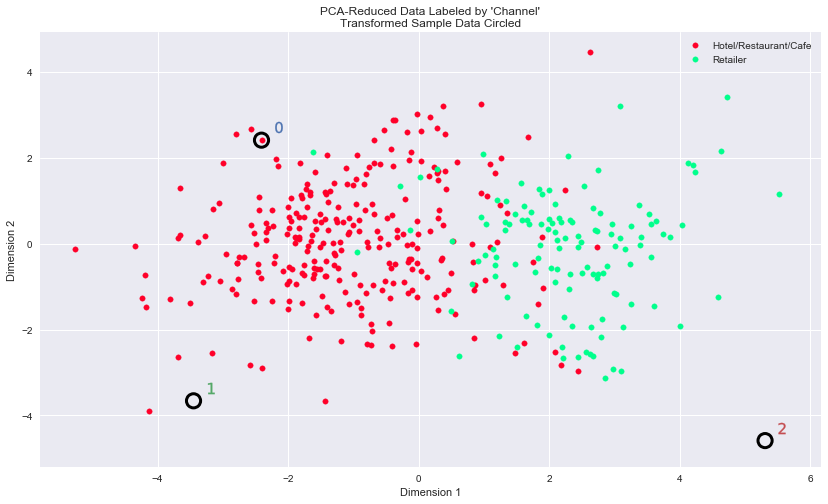

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** It seems my cluster 0, or "small place" is gone. However, my two other clusters "supermarket" and "market" are still there. Just that market was Hotels in the end - i guess they also use less Det_Paper, Milk and Grocery than a retailer (to be honest i dont know). There are segments of purely retailers below -2.5 on dim1, and purely horeca above 2 on dim1. These classifications are consistent with my previous definition of segments, although there is a larger overlap region as expected.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.